In [38]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

from sklearn.svm import SVC
from EML_plot import plot_svc

In [27]:
X, y = load_digits(return_X_y=True)

In [28]:
X.shape, y.shape

((1797, 64), (1797,))

In [29]:
i = np.random.randint(0,len(X))
print("this will show number ", i)
pixels = np.reshape(X[i,:],(8,8))
pixels

this will show number  8


array([[ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  0., 12., 14., 14., 12.,  0.,  0.],
       [ 0.,  0.,  9., 10.,  0., 15.,  4.,  0.],
       [ 0.,  0.,  3., 16., 12., 14.,  2.,  0.],
       [ 0.,  0.,  4., 16., 16.,  2.,  0.,  0.],
       [ 0.,  3., 16.,  8., 10., 13.,  2.,  0.],
       [ 0.,  1., 15.,  1.,  3., 16.,  8.,  0.],
       [ 0.,  0., 11., 16., 15., 11.,  1.,  0.]])

Label 8


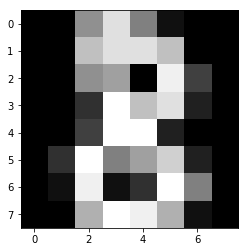

In [30]:
plt.imshow(pixels, cmap="gray")
print("Label", y[i])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [32]:
pipeline = Pipeline([
    ("ss", StandardScaler()),
    ("svm", SVC(kernel="rbf"))])

params = {
    "svm__C" : np.logspace(3,12,4),
    "svm__gamma" : np.logspace(-3,3,7),
}

model = GridSearchCV(pipeline,param_grid=params,n_jobs=-1,cv=3)
model.fit(X_train,y_train)
model.best_params_

{'svm__C': 1000.0, 'svm__gamma': 0.01}

In [33]:
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.9805555555555555)

In [34]:
print(accuracy_score(y_train,model.predict(X_train)))
print(accuracy_score(y_test,model.predict(X_test)))

1.0
0.9805555555555555


[ 0.  0.  9. 16. 16. 15.  4.  0.  0.  8. 16.  9.  7. 14. 11.  0.  0.  5.
  5.  1. 13. 15.  1.  0.  0.  0.  0. 10. 16.  7.  0.  0.  0.  0.  0.  1.
 11. 16.  4.  0.  0.  0.  0.  0.  0. 14.  8.  0.  0.  0.  3.  4.  6. 16.
  4.  0.  0.  0. 14. 16. 16.  8.  0.  0.]
(360, 64)
(64,)
[[ 0.  0.  9. 16. 16. 15.  4.  0.  0.  8. 16.  9.  7. 14. 11.  0.  0.  5.
   5.  1. 13. 15.  1.  0.  0.  0.  0. 10. 16.  7.  0.  0.  0.  0.  0.  1.
  11. 16.  4.  0.  0.  0.  0.  0.  0. 14.  8.  0.  0.  0.  3.  4.  6. 16.
   4.  0.  0.  0. 14. 16. 16.  8.  0.  0.]]
(1, 64)
The value should be 3
and predicted as  [3]


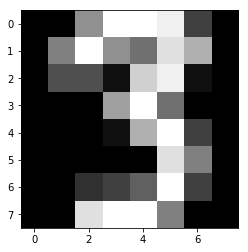

In [62]:
i = np.random.randint(0, len(X_test))
pixels = np.reshape(X_test[i,:], (8,8))
plt.imshow(pixels, cmap="gray")

print(X_test[i, :])
print(X_test.shape)

#reshape X_test[i, :] so it can be predicted
print(X_test[i, :].shape)
predicted_pixels = np.reshape(X_test[i, :], (1,-1))
print(predicted_pixels)
print(predicted_pixels.shape)

print("The value should be", y_test[i])
print("and predicted as ", model.predict(np.reshape(X_test[i, :], (1,-1))))

In [58]:
f1_score(y_test, model.predict(X_test), average=None)

array([1.        , 1.        , 0.98507463, 0.97058824, 1.        ,
       0.96774194, 0.98591549, 0.98507463, 0.96666667, 0.95      ])